In [1]:
import matplotlib.pyplot as plt
from gaiaxpy import calibrate
import numpy as np

# id = 38655544960  # first entry
# id = 2947050466531872640   # Paper Fig. 22
# id = 2947047202356748672
id = 194912732657384320

# sampling = np.arange(336, 1021, 2)
sampling = np.arange(336, 1021, 10)

data, _ = calibrate([id], sampling=sampling, save_file=False)

<ErrorbarContainer object of 3 artists>

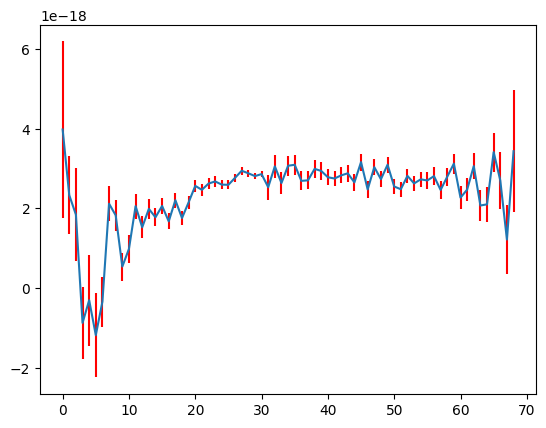

In [2]:
# plt.plot(data["flux"][0])
plt.errorbar(
    range(len(data["flux"][0])),
    data["flux"][0],
    yerr=data["flux_error"][0],
    ecolor="red",
)

In [3]:
min = data["flux"].apply(min)
max = data["flux"].apply(max)
min, max

(0   -1.178915e-18
 Name: flux, dtype: float64,
 0    3.979145e-18
 Name: flux, dtype: float64)

In [4]:
data["flux_norm"] = data["flux"].apply(
    lambda x: [(val - min[0]) / (max[0] - min[0]) for val in x]
)
data["flux_error_norm"] = data["flux_error"].apply(
    lambda x: [(val - min[0]) / (max[0] - min[0]) for val in x]
)

<ErrorbarContainer object of 3 artists>

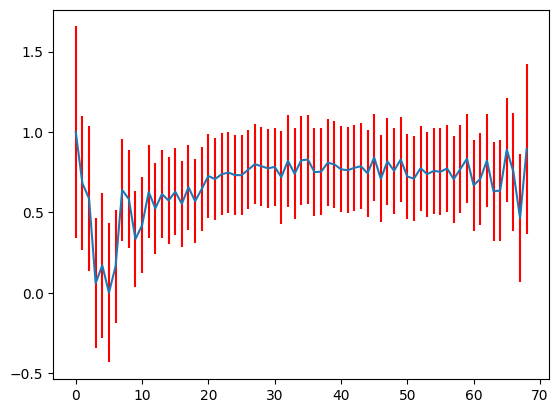

In [5]:
plt.errorbar(
    range(len(data["flux_norm"][0])),
    data["flux_norm"][0],
    yerr=data["flux_error_norm"][0],
    ecolor="red",
)

In [6]:
# import torch

# max = torch.zeros(343)
# min = torch.ones(343)
# for i in range(0, 1000):
#     sample = torch.normal(
#         mean=torch.Tensor(data["flux"][0]), std=torch.Tensor(data["flux_error"][0])
#     )
#     max = torch.maximum(sample, max)
#     min = torch.minimum(sample, min)
# plt.plot(max.numpy())
# plt.plot(min.numpy())

In [7]:
# max = max.numpy()
# min = min.numpy()
# normalized_max = (max - np.min(max)) / (np.max(max) - np.min(max))
# normalized_min = (min - np.min(min)) / (np.max(min) - np.min(min))
# plt.plot(normalized_max)
# plt.plot(normalized_min)